In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from io import BytesIO
from csv import writer 
import imblearn as im
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored
from collections import Counter
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from io import StringIO
from sklearn.tree import DecisionTreeClassifier

In [2]:
from datetime import timedelta, date
from dateutil import parser
import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
import random

In [3]:
import tensorflow as tf
from tensorflow import keras

2023-08-08 14:10:02.501857: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 14:10:02.604525: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 14:10:03.888482: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
whole_set = pd.read_csv('./1. Data Science challenge- JobFair 2022/2. job_fair_retention_prediction_2022_training.csv')
whole_set

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned
0,2022-06-02,3,0,1,1,3,1,2,320.0,2820.0,Xiaomi Redmi 7,Android OS 10 / API-29,1,1
1,2022-06-02,1,2,1,1,4,1,0,480.0,2740.0,OMIX OMIX X300,Android OS 11 / API-30,1,0
2,2022-06-02,3,0,1,1,3,1,1,315.0,3571.0,samsung SM-M215F,Android OS 11 / API-30,1,0
3,2022-06-02,1,2,2,1,2,1,10,320.0,3774.0,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,1
4,2022-06-02,1,2,2,1,1,1,1,320.0,889.0,samsung SM-A013G,Android OS 10 / API-29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342327,2022-09-15,1,1,2,2,2,1,11,480.0,2848.0,LENOVO Lenovo K53a48,Android OS 7.0 / API-24,1,0
342328,2022-09-15,2,0,2,1,4,1,1,420.0,7443.0,samsung SM-N985F,Android OS 12 / API-31,3,0
342329,2022-09-15,1,1,1,1,3,1,4,320.0,3688.0,HUAWEI MAR-LX1A,Android OS 10 / API-29,1,0
342330,2022-09-15,1,1,1,1,4,1,0,480.0,3748.0,OMIX OMIX X500,Android OS 11 / API-30,2,0


In [7]:
new_cols_order = whole_set.select_dtypes(include=object).columns.to_list() + whole_set.select_dtypes(include='number').columns.to_list()
new_cols_order

['date',
 'device_model',
 'os_version',
 'registration_type',
 'played_t11_before',
 'registration_channel',
 'network_type',
 'device_tier',
 'device_type',
 'device_manufacturer',
 'screen_dpi',
 'device_memory_size_mb',
 'registrations',
 'returned']

In [8]:
whole_set = whole_set[new_cols_order]
whole_set

,date,device_model,os_version,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned
0,2022-06-02,Xiaomi Redmi 7,Android OS 10 / API-29,3,0,1,1,3,1,2,320.0,2820.0,1,1
1,2022-06-02,OMIX OMIX X300,Android OS 11 / API-30,1,2,1,1,4,1,0,480.0,2740.0,1,0
2,2022-06-02,samsung SM-M215F,Android OS 11 / API-30,3,0,1,1,3,1,1,315.0,3571.0,1,0
3,2022-06-02,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,2,2,1,2,1,10,320.0,3774.0,1,1
4,2022-06-02,samsung SM-A013G,Android OS 10 / API-29,1,2,2,1,1,1,1,320.0,889.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342327,2022-09-15,LENOVO Lenovo K53a48,Android OS 7.0 / API-24,1,1,2,2,2,1,11,480.0,2848.0,1,0
342328,2022-09-15,samsung SM-N985F,Android OS 12 / API-31,2,0,2,1,4,1,1,420.0,7443.0,3,0
342329,2022-09-15,HUAWEI MAR-LX1A,Android OS 10 / API-29,1,1,1,1,3,1,4,320.0,3688.0,1,0
342330,2022-09-15,OMIX OMIX X500,Android OS 11 / API-30,1,1,1,1,4,1,0,480.0,3748.0,2,0


In [9]:
whole_train_set = whole_set[whole_set['date'] <= '2022-08-31']
whole_train_set

,date,device_model,os_version,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned
0,2022-06-02,Xiaomi Redmi 7,Android OS 10 / API-29,3,0,1,1,3,1,2,320.0,2820.0,1,1
1,2022-06-02,OMIX OMIX X300,Android OS 11 / API-30,1,2,1,1,4,1,0,480.0,2740.0,1,0
2,2022-06-02,samsung SM-M215F,Android OS 11 / API-30,3,0,1,1,3,1,1,315.0,3571.0,1,0
3,2022-06-02,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,2,2,1,2,1,10,320.0,3774.0,1,1
4,2022-06-02,samsung SM-A013G,Android OS 10 / API-29,1,2,2,1,1,1,1,320.0,889.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293046,2022-08-31,EVEREST-EVERPAD DC-8015,Android OS 10 / API-29,1,2,1,1,2,2,0,160.0,1994.0,1,0
293047,2022-08-31,Xiaomi 2201117TG,Android OS 12 / API-31,1,2,2,1,3,1,2,440.0,5656.0,2,0
293048,2022-08-31,HUAWEI LYA-AL00,Android OS 10 / API-29,1,2,2,1,2,1,4,408.0,3673.0,1,1
293049,2022-08-31,samsung SM-G965F,Android OS 10 / API-29,3,0,2,1,4,1,1,357.0,5620.0,2,1


In [10]:
whole_train_set['retention_d1'] = whole_train_set['returned'] / whole_train_set['registrations']
whole_train_set

/tmp/ipykernel_19559/3305202738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_train_set['retention_d1'] = whole_train_set['returned'] / whole_train_set['registrations']


,date,device_model,os_version,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned,retention_d1
0,2022-06-02,Xiaomi Redmi 7,Android OS 10 / API-29,3,0,1,1,3,1,2,320.0,2820.0,1,1,1.0
1,2022-06-02,OMIX OMIX X300,Android OS 11 / API-30,1,2,1,1,4,1,0,480.0,2740.0,1,0,0.0
2,2022-06-02,samsung SM-M215F,Android OS 11 / API-30,3,0,1,1,3,1,1,315.0,3571.0,1,0,0.0
3,2022-06-02,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,2,2,1,2,1,10,320.0,3774.0,1,1,1.0
4,2022-06-02,samsung SM-A013G,Android OS 10 / API-29,1,2,2,1,1,1,1,320.0,889.0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293046,2022-08-31,EVEREST-EVERPAD DC-8015,Android OS 10 / API-29,1,2,1,1,2,2,0,160.0,1994.0,1,0,0.0
293047,2022-08-31,Xiaomi 2201117TG,Android OS 12 / API-31,1,2,2,1,3,1,2,440.0,5656.0,2,0,0.0
293048,2022-08-31,HUAWEI LYA-AL00,Android OS 10 / API-29,1,2,2,1,2,1,4,408.0,3673.0,1,1,1.0
293049,2022-08-31,samsung SM-G965F,Android OS 10 / API-29,3,0,2,1,4,1,1,357.0,5620.0,2,1,0.5


In [11]:
retention_d1_values = np.sort(whole_train_set['retention_d1'].unique())
retention_d1_values

array([0.        , 0.02272727, 0.02857143, 0.03333333, 0.03448276,
       0.04166667, 0.04347826, 0.04761905, 0.05      , 0.05263158,
       0.05555556, 0.05714286, 0.05882353, 0.0625    , 0.06451613,
       0.06666667, 0.07142857, 0.075     , 0.07692308, 0.08      ,
       0.08333333, 0.08695652, 0.09090909, 0.0952381 , 0.1       ,
       0.10344828, 0.10526316, 0.10810811, 0.11111111, 0.11428571,
       0.11538462, 0.11764706, 0.12      , 0.12195122, 0.125     ,
       0.12903226, 0.13043478, 0.13157895, 0.13333333, 0.13636364,
       0.13793103, 0.14285714, 0.14814815, 0.15      , 0.15384615,
       0.15789474, 0.15909091, 0.16      , 0.16216216, 0.16666667,
       0.17241379, 0.17391304, 0.17647059, 0.17857143, 0.17948718,
       0.18181818, 0.18518519, 0.1875    , 0.19047619, 0.19230769,
       0.19444444, 0.2       , 0.20689655, 0.20833333, 0.21052632,
       0.21428571, 0.2173913 , 0.22222222, 0.22580645, 0.22727273,
       0.23076923, 0.23333333, 0.23529412, 0.23809524, 0.24   

In [12]:
retention_d1_values_size = []
for value in retention_d1_values:
    size = (whole_train_set[whole_train_set['retention_d1'] == value])['registrations'].sum()
    retention_d1_values_size.append(size)
    print(value, ' : ', size)
retention_d1_values_size = np.array(retention_d1_values_size)

0.0  :  227072
0.022727272727272728  :  44
0.02857142857142857  :  35
0.03333333333333333  :  30
0.034482758620689655  :  29
0.041666666666666664  :  24
0.043478260869565216  :  23
0.047619047619047616  :  21
0.05  :  20
0.05263157894736842  :  57
0.05555555555555555  :  72
0.05714285714285714  :  70
0.058823529411764705  :  119
0.0625  :  128
0.06451612903225806  :  31
0.06666666666666667  :  120
0.07142857142857142  :  238
0.075  :  40
0.07692307692307693  :  520
0.08  :  50
0.08333333333333333  :  684
0.08695652173913043  :  23
0.09090909090909091  :  902
0.09523809523809523  :  84
0.1  :  1310
0.10344827586206896  :  29
0.10526315789473684  :  76
0.10810810810810811  :  37
0.1111111111111111  :  1494
0.11428571428571428  :  35
0.11538461538461539  :  78
0.11764705882352941  :  153
0.12  :  25
0.12195121951219512  :  41
0.125  :  2952
0.12903225806451613  :  62
0.13043478260869565  :  46
0.13157894736842105  :  38
0.13333333333333333  :  420
0.13636363636363635  :  88
0.137931034482

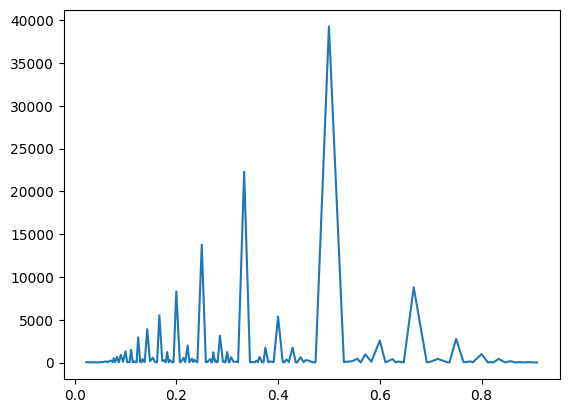

In [13]:
plt.plot(retention_d1_values[1:-1], retention_d1_values_size[1:-1])

In [14]:
retention_d1_values[161]

0.8

In [15]:
r0 =(retention_d1_values[0] * retention_d1_values_size[0]).sum() / retention_d1_values_size[0].sum()
r0

0.0

In [16]:
r1 = (retention_d1_values[1:-1] * retention_d1_values_size[1:-1]).sum() / retention_d1_values_size[1:-1].sum()
r1

0.3756341824331466

In [17]:
r2 = (retention_d1_values[-1] * retention_d1_values_size[-1]).sum() / retention_d1_values_size[-1].sum()
r2

1.0

In [18]:
whole_train_set = whole_train_set.drop(['retention_d1'], axis=1)
whole_train_set

,date,device_model,os_version,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned
0,2022-06-02,Xiaomi Redmi 7,Android OS 10 / API-29,3,0,1,1,3,1,2,320.0,2820.0,1,1
1,2022-06-02,OMIX OMIX X300,Android OS 11 / API-30,1,2,1,1,4,1,0,480.0,2740.0,1,0
2,2022-06-02,samsung SM-M215F,Android OS 11 / API-30,3,0,1,1,3,1,1,315.0,3571.0,1,0
3,2022-06-02,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,2,2,1,2,1,10,320.0,3774.0,1,1
4,2022-06-02,samsung SM-A013G,Android OS 10 / API-29,1,2,2,1,1,1,1,320.0,889.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293046,2022-08-31,EVEREST-EVERPAD DC-8015,Android OS 10 / API-29,1,2,1,1,2,2,0,160.0,1994.0,1,0
293047,2022-08-31,Xiaomi 2201117TG,Android OS 12 / API-31,1,2,2,1,3,1,2,440.0,5656.0,2,0
293048,2022-08-31,HUAWEI LYA-AL00,Android OS 10 / API-29,1,2,2,1,2,1,4,408.0,3673.0,1,1
293049,2022-08-31,samsung SM-G965F,Android OS 10 / API-29,3,0,2,1,4,1,1,357.0,5620.0,2,1


In [19]:
#output = StringIO()
#csv_writer = writer(output)

In [20]:
#whole_train_set['registrations'].sum()

In [21]:
#header = whole_train_set.columns.to_list()
#header

In [22]:
#for ids in whole_train_set.index:
#    instance = whole_train_set.loc[ids]
#    new_instance = instance.copy()
#    for i in range(instance['registrations']):
#        if instance['registrations'] == 1:
#            pass
#        elif i < instance['returned']:
#            new_instance['returned'] = 1
#        else:
#            new_instance['returned'] = 0
#        #print(new_instance)
#        csv_writer.writerow(new_instance)
#output.seek(0)
#new_whole_train_set = pd.read_csv(output, header=None, names=header)
#new_whole_train_set

In [23]:
#new_whole_train_set = new_whole_train_set.drop(['registrations'], axis=1)
#new_whole_train_set

In [24]:
#whole_train_set = new_whole_train_set.copy()
#whole_train_set

In [25]:
#nwts2 = whole_train_set.copy()
#nwts2

In [26]:
#nwts2['retention_d1'] = whole_train_set['returned'] / whole_train_set['registrations']
#nwts2

In [27]:
#nwts2 = nwts2.drop(['registrations', 'returned'], axis=1)
#nwts2

In [28]:
#nwts2['returned'] = np.where(nwts2['retention_d1'] <= 0.5, 0, 1)
#nwts2

In [29]:
#nwts2 = nwts2.drop(['retention_d1'], axis=1)
#nwts2

In [30]:
#whole_train_set = nwts2.copy()
#whole_train_set

In [31]:
#for ids in whole_train_set.index:
#    instance = whole_train_set.loc[ids]
#    new_instance = instance.copy()
#   for i in range(instance['registrations']):
#        if instance['returned'] / instance['registrations'] < 0.5:
#            new_instance['returned'] = 0
#        else:
#            new_instance['returned'] = 1
#        #print(new_instance)
#        csv_writer.writerow(new_instance)
#output.seek(0)
#nwts3 = pd.read_csv(output, header=None, names=header)
#nwts3

In [32]:
#nwts3 = nwts3.drop(['registrations'], axis=1)
#nwts3

In [33]:
#whole_train_set = nwts3.copy()
#whole_train_set

In [34]:
#nwts4 = whole_train_set.copy()
#nwts4

In [35]:
#nwts4['retention_d1'] = np.select([
#    (nwts4['retention_d1'] < 0.33),
#    (nwts4['retention_d1'] > 0.67),
#    (nwts4['retention_d1'] >= 0.33) & (nwts4['retention_d1'] <= 0.67)
#], [0, 1, 2])
#nwts4

In [36]:
#nwts4 = nwts4.drop(['returned'], axis=1)
#nwts4

In [37]:
#nwts4 = nwts4.drop(['registrations'], axis=1)
#nwts4

In [38]:
#whole_train_set = nwts4.copy()
#whole_train_set

In [39]:
#nwts5 = whole_train_set.copy()
#nwts5

In [40]:
#nwts5['retention_d1'] = np.select([
#    (nwts5['retention_d1'] == 0),
#    (nwts5['retention_d1'] == 1),
#    (nwts5['retention_d1'] == 0.5),
#    (0 < nwts5['retention_d1']) & (nwts5['retention_d1'] < 0.5),
#    (0.5 < nwts5['retention_d1']) & (nwts5['retention_d1'] < 1)
#], [0, 1, 2, 3, 4])
#nwts5

In [41]:
#nwts5 = nwts5.drop(['returned'], axis=1)
#nwts5

In [42]:
#whole_train_set = nwts5.copy()
#whole_train_set

In [43]:
n = 18
format_string = '%Y-%m-%d'
start_date = whole_train_set['date'][0]
end_date = (parser.parse(start_date) + timedelta(days=n)).strftime(format_string)
condition = whole_train_set['date'][len(whole_train_set['date'])-1]
i = 0

train_val_sets_pairs = []

while end_date <= condition:
    val_set = whole_train_set[(start_date <= whole_train_set['date']) & (whole_train_set['date'] <= end_date)]
    train_set = whole_train_set[~whole_train_set.index.isin(val_set.index)]
    train_val_sets_pairs.append([train_set, val_set])
    start_date = end_date
    end_date = (parser.parse(start_date) + timedelta(days=n)).strftime(format_string)

In [44]:
train_val_sets_pairs[4][1]

,date,device_model,os_version,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned
227107,2022-08-13,samsung SM-T500,Android OS 12 / API-31,1,1,1,1,4,2,1,240.0,2703.0,1,0
227108,2022-08-13,HUAWEI HUAWEI NMO-L31,Android OS 7.0 / API-24,1,1,1,2,2,1,4,480.0,1781.0,1,0
227109,2022-08-13,Xiaomi MI 8 Lite,Android OS 10 / API-29,3,0,2,1,3,1,2,440.0,3726.0,2,0
227110,2022-08-13,samsung GT-I9060I,Android OS 4.4.4 / API-19,1,1,1,1,1,1,1,240.0,952.0,1,0
227111,2022-08-13,Xiaomi 2201117TG,Android OS 12 / API-31,1,2,2,1,3,1,2,440.0,5656.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293046,2022-08-31,EVEREST-EVERPAD DC-8015,Android OS 10 / API-29,1,2,1,1,2,2,0,160.0,1994.0,1,0
293047,2022-08-31,Xiaomi 2201117TG,Android OS 12 / API-31,1,2,2,1,3,1,2,440.0,5656.0,2,0
293048,2022-08-31,HUAWEI LYA-AL00,Android OS 10 / API-29,1,2,2,1,2,1,4,408.0,3673.0,1,1
293049,2022-08-31,samsung SM-G965F,Android OS 10 / API-29,3,0,2,1,4,1,1,357.0,5620.0,2,1


In [45]:
#pipeline

In [46]:
CT = ColumnTransformer([('oe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                        ['date', 'device_model', 'os_version'])],
                       remainder='passthrough')

In [47]:
pipe = Pipeline([('ct', CT),
                 ('mice', IterativeImputer(random_state=42, max_iter=10)),
                 ('ss', StandardScaler())
                ])

In [48]:
dates = []
registrations = []

In [49]:
for train_val_sets_pair in train_val_sets_pairs:
    train_set = train_val_sets_pair[0].reset_index(drop=True).copy()
    X_train = train_set.drop(['returned'], axis=1)
    y_train = train_set['returned']
    numerical_attributes = train_set.select_dtypes(include=np.number).copy()
    num_attrs = numerical_attributes.columns.to_list()
    categorical_attributes = train_set.select_dtypes(include=object).copy()
    cat_attrs = categorical_attributes.columns.to_list()
    X_train = pd.DataFrame(pipe.fit_transform(X_train), columns=X_train.columns)
    #print(X_train_1.isna().sum().sum())
    new_train_set = X_train.copy()
    new_train_set['returned'] = y_train
    train_val_sets_pair[0] = new_train_set
    
    val_set = train_val_sets_pair[1].reset_index(drop=True).copy()
    X_val = val_set.drop(['returned'], axis=1)
    date = X_val['date']
    dates.append(date)
    registration = X_val['registrations']
    registrations.append(registration)
    y_val = val_set['returned']
    X_val = pd.DataFrame(pipe.transform(X_val), columns=X_val.columns)
    #print(X_val.isna().sum().sum())
    new_val_set = X_val.copy()
    new_val_set['returned'] = y_val
    train_val_sets_pair[1] = new_val_set

In [50]:
train_val_sets_pairs[0][1]

,date,device_model,os_version,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned
0,-1.73818,0.069958,-0.857298,1.773878,-1.147597,-0.959842,-0.471418,0.076334,-0.348076,-0.127306,-0.433529,-0.614558,-0.344401,1
1,-1.73818,-0.858478,-0.502960,-0.720378,1.091027,-0.959842,-0.471418,1.039506,-0.348076,-0.909293,1.373288,-0.656699,-0.344401,0
2,-1.73818,1.191983,-0.502960,1.773878,-1.147597,-0.959842,-0.471418,0.076334,-0.348076,-0.518299,-0.489992,-0.218951,-0.344401,0
3,-1.73818,-0.342241,1.918348,-0.720378,1.091027,0.823379,-0.471418,-0.886838,-0.348076,3.000642,-0.433529,-0.112016,-0.344401,1
4,-1.73818,0.650724,-0.857298,-0.720378,1.091027,0.823379,-0.471418,-1.850010,-0.348076,-0.518299,-0.433529,-1.631757,-0.344401,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58657,-1.73818,0.681014,-0.502960,1.773878,-1.147597,-0.959842,-0.471418,0.076334,-0.348076,-0.518299,-0.885233,-0.163113,-0.344401,1
58658,-1.73818,1.376353,-0.502960,-0.720378,-0.028285,0.823379,-0.471418,0.076334,2.872939,-0.518299,-2.014493,-1.098662,-0.344401,1
58659,-1.73818,0.570391,-0.502960,-0.720378,1.091027,0.823379,1.273831,0.076334,-0.348076,-0.909293,-1.336937,-0.095159,-0.344401,0
58660,-1.73818,0.819291,-0.857298,1.773878,-1.147597,-0.959842,-0.471418,0.076334,-0.348076,-0.518299,-0.489992,-0.151524,0.259069,1


In [51]:
def Dtr(X_train, y_train, X_val, y_val):
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    y_val_pred_dtr = dtr.predict(X_val)
    y_val_pred_dtr = y_val_pred_dtr.round()
    #print('dtr:', y_val_pred_dtr.sum())
    return y_val_pred_dtr

In [52]:
def Lr(X_train, y_train, X_val, y_val):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_val_pred_lr = lr.predict(X_val)
    y_val_pred_lr = y_val_pred_lr.round()
    #print('lr:', y_val_pred_lr.sum())
    return y_val_pred_lr

In [53]:
def Poly(X_train, y_train, X_val, y_val):
    pipe2 = Pipeline([('poly_features', PolynomialFeatures(degree=2)), ('model', LinearRegression())])
    pipe2.fit(X_train, y_train)
    y_val_pred_poly = pipe2.predict(X_val)
    
    y_val_pred_poly = y_val_pred_poly.round()
    #print('lr:', y_val_pred_lr.sum())
    return y_val_pred_poly

In [54]:
def Knn(X_train, y_train, X_val, y_val):
    knn = KNeighborsRegressor(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_val_pred_knn = knn.predict(X_val)
    y_val_pred_knn = y_val_pred_knn.round()
    print('knn:', y_val_pred_knn.sum())
    return y_val_pred_knn

In [55]:
def Ann(X_train, y_train, X_val, y_val):
    np.random.seed(42) 
    random.seed(42)
    tf.random.set_seed(42)
    
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=[13]),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
        ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    
    #print(model.summary())
    
    model.fit(X_train, y_train, epochs=10)
    y_val_pred_ann = model.predict(X_val)
    y_val_pred_ann = np.array(y_val_pred_ann).flatten()
    
    y_val_pred_ann = y_val_pred_ann.round()
    #print('ann:', y_val_pred_ann.sum())
    return y_val_pred_ann

In [56]:
for i, train_val_sets_pair in enumerate(train_val_sets_pairs):
    train_set = train_val_sets_pair[0].reset_index(drop=True).copy()
    X_train = train_set.drop(['returned'], axis=1)
    y_train = train_set['returned']
    
    val_set = train_val_sets_pair[1].reset_index(drop=True).copy()
    X_val = val_set.drop(['returned'], axis=1)
    y_val = val_set['returned']
    print(f'Val_set_{i}: {y_val.sum()}')
    
    date = dates[i]
    registration = registrations[i]
    
    y_val_pred_dtr = Dtr(X_train, y_train, X_val, y_val)
    y_val_pred_lr = Lr(X_train, y_train, X_val, y_val)
    y_val_pred_poly = Poly(X_train, y_train, X_val, y_val)
    y_val_pred_knn = Knn(X_train, y_train, X_val, y_val)
    y_val_pred_ann = Ann(X_train, y_train, X_val, y_val)
    #y_val_pred_ann = y_val_pred_knn
    
    results = pd.DataFrame(data = {'date' : date, 'registrations' : registration, 'returned' : y_val,
                                   'dtr' : y_val_pred_dtr, 'lr' : y_val_pred_lr, 'poly': y_val_pred_poly,
                                   'knn' : y_val_pred_knn, 'ann' : y_val_pred_ann}) \
              .groupby(['date'])['returned', 'registrations', 'dtr', 'lr', 'poly', 'knn', 'ann'].sum()
    #print(results)
    
    rmse_dtr = mean_squared_error(results['returned'] / results['registrations'],
                                  results['dtr'] / results['registrations'], squared=False)
    rmse_lr = mean_squared_error(results['returned'] / results['registrations'],
                                  results['lr'] / results['registrations'], squared=False)
    rmse_poly = mean_squared_error(results['returned'] / results['registrations'],
                                  results['poly'] / results['registrations'], squared=False)
    rmse_knn = mean_squared_error(results['returned'] / results['registrations'],
                                  results['knn'] / results['registrations'], squared=False)
    rmse_ann = mean_squared_error(results['returned'] / results['registrations'],
                                  results['ann'] / results['registrations'], squared=False)
    
    print('dtr: ', rmse_dtr)
    print('lr: ', rmse_lr)
    print('poly: ', rmse_poly)
    print('knn: ', rmse_knn)
    print('ann: ', rmse_ann)
    
    print('\n')

Val_set_0: 27019
knn: 28229.0
Epoch 1/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3332 - mae: 0.4610 - mse: 0.3332
Epoch 2/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3204 - mae: 0.4566 - mse: 0.3204
Epoch 3/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3185 - mae: 0.4563 - mse: 0.3185
Epoch 4/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3173 - mae: 0.4559 - mse: 0.3173
Epoch 5/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3166 - mae: 0.4556 - mse: 0.3166
Epoch 6/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3158 - mae: 0.4552 - mse: 0.3158
Epoch 7/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3158 - mae: 0.4553 - mse: 0.3158
Epoch 8/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3150 - mae: 0.4547 - mse: 0.3150
Epoch 9/10
7325/7325 [==============================] - 9s 1ms/step - loss: 0.3151

/tmp/ipykernel_19559/265918860.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = pd.DataFrame(data = {'date' : date, 'registrations' : registration, 'returned' : y_val,


dtr:  0.02979464630927626
lr:  0.046732869481490115
poly:  0.039305695909416925
knn:  0.016051451770618036
ann:  0.06883488714737403


Val_set_1: 30350
knn: 29012.0
Epoch 1/10
7187/7187 [==============================] - 9s 1ms/step - loss: 0.3271 - mae: 0.4581 - mse: 0.3271
Epoch 2/10
7187/7187 [==============================] - 9s 1ms/step - loss: 0.3158 - mae: 0.4533 - mse: 0.3158
Epoch 3/10
7187/7187 [==============================] - 9s 1ms/step - loss: 0.3137 - mae: 0.4526 - mse: 0.3137
Epoch 4/10
7187/7187 [==============================] - 9s 1ms/step - loss: 0.3128 - mae: 0.4525 - mse: 0.3128
Epoch 5/10
7187/7187 [==============================] - 9s 1ms/step - loss: 0.3116 - mae: 0.4523 - mse: 0.3116
Epoch 6/10
7187/7187 [==============================] - 10s 1ms/step - loss: 0.3113 - mae: 0.4522 - mse: 0.3113
Epoch 7/10
7187/7187 [==============================] - 10s 1ms/step - loss: 0.3106 - mae: 0.4521 - mse: 0.3106
Epoch 8/10
7187/7187 [==============================] - 

/tmp/ipykernel_19559/265918860.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = pd.DataFrame(data = {'date' : date, 'registrations' : registration, 'returned' : y_val,


dtr:  0.020794766644347144
lr:  0.06392433119698152
poly:  0.0727983942129966
knn:  0.021305685564822624
ann:  0.09206426057067052


Val_set_2: 27457
knn: 26364.0
Epoch 1/10
7333/7333 [==============================] - 10s 1ms/step - loss: 0.3337 - mae: 0.4597 - mse: 0.3337
Epoch 2/10
7333/7333 [==============================] - 10s 1ms/step - loss: 0.3195 - mae: 0.4550 - mse: 0.3195
Epoch 3/10
7333/7333 [==============================] - 10s 1ms/step - loss: 0.3173 - mae: 0.4541 - mse: 0.3173
Epoch 4/10
7333/7333 [==============================] - 10s 1ms/step - loss: 0.3162 - mae: 0.4537 - mse: 0.3162
Epoch 5/10
7333/7333 [==============================] - 10s 1ms/step - loss: 0.3147 - mae: 0.4532 - mse: 0.3147
Epoch 6/10
7333/7333 [==============================] - 11s 1ms/step - loss: 0.3147 - mae: 0.4530 - mse: 0.3147
Epoch 7/10
7333/7333 [==============================] - 11s 2ms/step - loss: 0.3149 - mae: 0.4527 - mse: 0.3149
Epoch 8/10
7333/7333 [==============================]

/tmp/ipykernel_19559/265918860.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = pd.DataFrame(data = {'date' : date, 'registrations' : registration, 'returned' : y_val,


dtr:  0.01667078438945849
lr:  0.06901588730825156
poly:  0.07127706475978746
knn:  0.014792411601289924
ann:  0.08423395159484696


Val_set_3: 27712
knn: 26802.0
Epoch 1/10
7288/7288 [==============================] - 10s 1ms/step - loss: 0.3330 - mae: 0.4600 - mse: 0.3330
Epoch 2/10
7288/7288 [==============================] - 10s 1ms/step - loss: 0.3215 - mae: 0.4557 - mse: 0.3215
Epoch 3/10
7288/7288 [==============================] - 10s 1ms/step - loss: 0.3187 - mae: 0.4551 - mse: 0.3187
Epoch 4/10
7288/7288 [==============================] - 10s 1ms/step - loss: 0.3166 - mae: 0.4549 - mse: 0.3166
Epoch 5/10
7288/7288 [==============================] - 10s 1ms/step - loss: 0.3159 - mae: 0.4546 - mse: 0.3159
Epoch 6/10
7288/7288 [==============================] - 11s 1ms/step - loss: 0.3155 - mae: 0.4545 - mse: 0.3155
Epoch 7/10
7288/7288 [==============================] - 11s 2ms/step - loss: 0.3156 - mae: 0.4542 - mse: 0.3156
Epoch 8/10
7288/7288 [==============================]

/tmp/ipykernel_19559/265918860.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = pd.DataFrame(data = {'date' : date, 'registrations' : registration, 'returned' : y_val,


dtr:  0.031140626063875097
lr:  0.06330978853410751
poly:  0.06782702250790097
knn:  0.015130458410467678
ann:  0.07413648530619402


Val_set_4: 32836
knn: 30749.0
Epoch 1/10
7098/7098 [==============================] - 10s 1ms/step - loss: 0.3276 - mae: 0.4564 - mse: 0.3276
Epoch 2/10
7098/7098 [==============================] - 9s 1ms/step - loss: 0.3153 - mae: 0.4519 - mse: 0.3153
Epoch 3/10
7098/7098 [==============================] - 10s 1ms/step - loss: 0.3131 - mae: 0.4514 - mse: 0.3131
Epoch 4/10
7098/7098 [==============================] - 10s 1ms/step - loss: 0.3118 - mae: 0.4508 - mse: 0.3118
Epoch 5/10
7098/7098 [==============================] - 10s 1ms/step - loss: 0.3103 - mae: 0.4507 - mse: 0.3103
Epoch 6/10
7098/7098 [==============================] - 10s 1ms/step - loss: 0.3109 - mae: 0.4505 - mse: 0.3109
Epoch 7/10
7098/7098 [==============================] - 11s 2ms/step - loss: 0.3100 - mae: 0.4504 - mse: 0.3100
Epoch 8/10
7098/7098 [==============================]

/tmp/ipykernel_19559/265918860.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = pd.DataFrame(data = {'date' : date, 'registrations' : registration, 'returned' : y_val,
